In [30]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [33]:
#Read csv
data_2014 = pd.read_csv("1-Data/OSMI 2014 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")
data_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [34]:
#cleaning data

data_2014_clean=data_2014.iloc[:,[1,2,3,7,9,10,11,12,13,14,18]]

data_2014_clean

,Age,Gender,Country,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,mental_health_consequence
0,37,Female,United States,Yes,6-25,No,Yes,Yes,Not sure,No,No
1,44,M,United States,No,More than 1000,No,No,Don't know,No,Don't know,Maybe
2,32,Male,Canada,No,6-25,No,Yes,No,No,No,No
3,31,Male,United Kingdom,Yes,26-100,No,Yes,No,Yes,No,Yes
4,31,Male,United States,No,100-500,Yes,Yes,Yes,No,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,Yes,26-100,No,Yes,No,No,No,No
1255,32,Male,United States,Yes,26-100,Yes,Yes,Yes,Yes,No,No
1256,34,male,United States,Yes,More than 1000,No,Yes,Yes,Yes,No,Yes
1257,46,f,United States,No,100-500,Yes,Yes,No,Yes,No,Yes


In [35]:
company_df = data_2014_clean.groupby('tech_company') #i made sure to have only tech companies
tech_company_df = company_df.get_group('Yes')
#mental_health_df = tech_company_df[['Country', 'care_options']].value_counts()

In [36]:
mental_health_df1=tech_company_df[tech_company_df["care_options"]=="Yes"]

Text(0.5, 1.0, 'Number of Care Options in Tech Companies per Country')

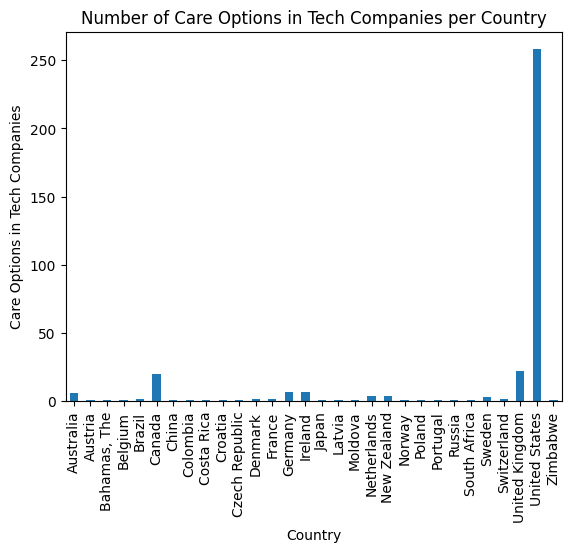

In [39]:
mental_health_df2=mental_health_df1.groupby('Country').count() #it counts how many comapanies per country
care_per_company=mental_health_df2["care_options"] #dataframe for care options in each comapny per country

care_per_company.plot.bar()
plt.xlabel("Country")
plt.ylabel("Care Options in Tech Companies")
plt.title("Number of Care Options in Tech Companies per Country")